In [1]:
import keras

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import os, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
PATH = "data/dogscats/"
sz=224
batch_size=64

In [4]:
train_data_dir = f'{PATH}train'
validation_data_dir = f'{PATH}valid'
test_data_dir = f'{PATH}test1'

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.resnet50 import preprocess_input

In [49]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [79]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_data_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [80]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


In [52]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 7s 72ms/step - loss: 0.2577 - acc: 0.8925 - val_loss: 0.3278 - val_acc: 0.8530
Epoch 2/30
 55/100 [===============>..............] - ETA: 1s - loss: 0.2401 - acc: 0.9036

KeyboardInterrupt: 

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [66]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [58]:
??model.fit_generator

In [56]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 7s 70ms/step - loss: 0.6918 - acc: 0.5195 - val_loss: 0.7568 - val_acc: 0.4930
Epoch 2/100
100/100 [==============================] - 7s 66ms/step - loss: 0.6806 - acc: 0.5600 - val_loss: 0.6630 - val_acc: 0.5750
Epoch 3/100
100/100 [==============================] - 6s 63ms/step - loss: 0.6653 - acc: 0.5990 - val_loss: 0.6514 - val_acc: 0.6090
Epoch 4/100
100/100 [==============================] - 6s 64ms/step - loss: 0.6399 - acc: 0.6330 - val_loss: 0.6595 - val_acc: 0.5900
Epoch 5/100
100/100 [==============================] - 6s 63ms/step - loss: 0.6182 - acc: 0.6435 - val_loss: 0.5933 - val_acc: 0.6800
Epoch 6/100
100/100 [==============================] - 6s 63ms/step - loss: 0.6068 - acc: 0.6710 - val_loss: 0.5852 - val_acc: 0.6850
Epoch 7/100
100/100 [==============================] - 6s 65ms/step - loss: 0.5840 - acc: 0.6895 - val_loss: 0.5836 - val_acc: 0.6920
Epoch 8/100
100/100 [==============================] - 6s 63ms

KeyboardInterrupt: 

In [6]:
from keras.applications.resnet50 import ResNet50

In [7]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [8]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [9]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [10]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
%%time
history = model.fit_generator(train_generator, train_generator.n // batch_size, epochs=3, workers=4,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

Epoch 1/3
359/359 [==============================] - 51s 141ms/step - loss: 0.4258 - acc: 0.9150 - val_loss: 1.8644 - val_acc: 0.5161
Epoch 2/3
359/359 [==============================] - 41s 114ms/step - loss: 0.1612 - acc: 0.9507 - val_loss: 1.7652 - val_acc: 0.4806
Epoch 3/3
359/359 [==============================] - 41s 114ms/step - loss: 0.1267 - acc: 0.9564 - val_loss: 2.1321 - val_acc: 0.5000
CPU times: user 1min 52s, sys: 3.92 s, total: 1min 56s
Wall time: 2min 12s


In [103]:
split_at = 140
for layer in model.layers[:split_at]: layer.trainable = False
for layer in model.layers[split_at:]: layer.trainable = True
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])  

In [104]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_11[0][0]                   
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_491 (Activation)     (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [107]:
%%time
history = model.fit_generator(train_generator, train_generator.n // batch_size, epochs=1, workers=3,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

Epoch 1/1
359/359 [==============================] - 53s 147ms/step - loss: 0.0812 - acc: 0.9760 - val_loss: 0.7491 - val_acc: 0.5161
CPU times: user 47.2 s, sys: 3.24 s, total: 50.4 s
Wall time: 52.7 s


In [108]:
model.save('cats_and_dogs_small_2.h5')

In [11]:
model.load_weights('cats_and_dogs_small_2.h5')

In [12]:
test_images = f'{PATH}test1'

In [13]:
test_images

'data/dogscats/test1'

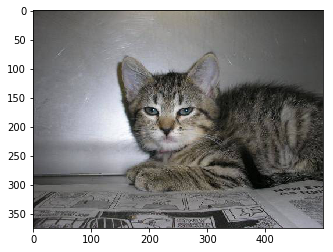

In [14]:
img1 = plt.imread("data/dogscats/test1/12209.jpg")
img = plt.imread("data/dogscats/test1/9885.jpg")
plt.imshow(img1)

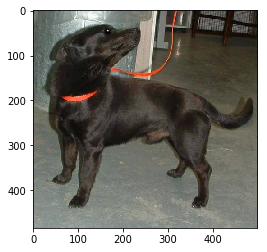

In [15]:
plt.imshow(img)

In [16]:
import numpy as np
import cv2

In [18]:
    for file in os.listdir(test_images):
        imgPath = os.path.join(test_images, file)
        x = cv2.imread(os.path.expanduser(imgPath))
        x = cv2.resize(x,dsize=(224,224),interpolation=cv2.INTER_LINEAR)
        x = x.astype(float)
        x *= (1./255)
        x = np.array([x])
        ## confirm prob
        result = model.predict(x)
        print(file + "  -->  " + str(result))

9885.jpg  -->  [[0.32893735]]
2701.jpg  -->  [[0.3243468]]
11231.jpg  -->  [[0.32316214]]
2964.jpg  -->  [[0.31493625]]
10651.jpg  -->  [[0.32258415]]
8302.jpg  -->  [[0.31837696]]
3656.jpg  -->  [[0.3045327]]
146.jpg  -->  [[0.32425138]]
2383.jpg  -->  [[0.32537153]]
8375.jpg  -->  [[0.3164528]]
12209.jpg  -->  [[0.32240018]]
2759.jpg  -->  [[0.32238594]]
7196.jpg  -->  [[0.32069945]]
6623.jpg  -->  [[0.32254443]]
9046.jpg  -->  [[0.32272485]]
3139.jpg  -->  [[0.3233611]]
2993.jpg  -->  [[0.31866136]]
7106.jpg  -->  [[0.33621514]]
1597.jpg  -->  [[0.31860742]]
7190.jpg  -->  [[0.31721836]]
4406.jpg  -->  [[0.3251734]]
11664.jpg  -->  [[0.32204723]]
9112.jpg  -->  [[0.3229829]]
1127.jpg  -->  [[0.32007664]]
8657.jpg  -->  [[0.32679313]]
5462.jpg  -->  [[0.32110325]]
4651.jpg  -->  [[0.3219135]]
9998.jpg  -->  [[0.32218146]]
12051.jpg  -->  [[0.32339796]]
11696.jpg  -->  [[0.32342675]]
1547.jpg  -->  [[0.3184974]]
4219.jpg  -->  [[0.31814256]]
8107.jpg  -->  [[0.31716773]]
9354.jpg  -->

3636.jpg  -->  [[0.32022172]]
539.jpg  -->  [[0.32246575]]
12370.jpg  -->  [[0.31860426]]
4069.jpg  -->  [[0.33236924]]
11529.jpg  -->  [[0.3212423]]
3133.jpg  -->  [[0.32130018]]
6782.jpg  -->  [[0.3046396]]
7669.jpg  -->  [[0.32109213]]
10173.jpg  -->  [[0.32503977]]
920.jpg  -->  [[0.31875095]]
5957.jpg  -->  [[0.31797555]]
8980.jpg  -->  [[0.3220238]]
10794.jpg  -->  [[0.31127635]]
8625.jpg  -->  [[0.3201077]]
8110.jpg  -->  [[0.32411063]]
5735.jpg  -->  [[0.32618192]]
12483.jpg  -->  [[0.32404694]]
3480.jpg  -->  [[0.32942915]]
1058.jpg  -->  [[0.32030436]]
4101.jpg  -->  [[0.3295268]]
7250.jpg  -->  [[0.32131866]]
4985.jpg  -->  [[0.32040536]]
8911.jpg  -->  [[0.3163563]]
10021.jpg  -->  [[0.3237853]]
9037.jpg  -->  [[0.31184956]]
2557.jpg  -->  [[0.3192765]]
6077.jpg  -->  [[0.3277408]]
11706.jpg  -->  [[0.32150307]]
5509.jpg  -->  [[0.32481042]]
4977.jpg  -->  [[0.32247835]]
455.jpg  -->  [[0.32620126]]
4719.jpg  -->  [[0.32323483]]
302.jpg  -->  [[0.32691845]]
10261.jpg  -->  

10643.jpg  -->  [[0.320329]]
7286.jpg  -->  [[0.3268873]]
941.jpg  -->  [[0.32007524]]
6225.jpg  -->  [[0.3192241]]
203.jpg  -->  [[0.32398847]]
7817.jpg  -->  [[0.3238053]]
10477.jpg  -->  [[0.3129329]]
5368.jpg  -->  [[0.31448027]]
3734.jpg  -->  [[0.31757024]]
9579.jpg  -->  [[0.3213536]]
10300.jpg  -->  [[0.3229325]]
6765.jpg  -->  [[0.3193982]]
3852.jpg  -->  [[0.321827]]
3408.jpg  -->  [[0.31464097]]
1218.jpg  -->  [[0.31662497]]
11420.jpg  -->  [[0.31254688]]
7624.jpg  -->  [[0.308634]]
2092.jpg  -->  [[0.32215732]]
4487.jpg  -->  [[0.32579955]]
7319.jpg  -->  [[0.31608427]]
4043.jpg  -->  [[0.32373422]]
6294.jpg  -->  [[0.32012177]]
4906.jpg  -->  [[0.3317625]]
8183.jpg  -->  [[0.324063]]
10868.jpg  -->  [[0.32064036]]
6440.jpg  -->  [[0.32784083]]
384.jpg  -->  [[0.32768348]]
3857.jpg  -->  [[0.32981738]]
4889.jpg  -->  [[0.32404697]]
1892.jpg  -->  [[0.3276181]]
3040.jpg  -->  [[0.31883597]]
10124.jpg  -->  [[0.32074666]]
5431.jpg  -->  [[0.3174407]]
3595.jpg  -->  [[0.322519

6006.jpg  -->  [[0.3206716]]
5091.jpg  -->  [[0.31884608]]
5211.jpg  -->  [[0.31092122]]
2135.jpg  -->  [[0.3231832]]
8747.jpg  -->  [[0.32344994]]
10509.jpg  -->  [[0.32178152]]
3033.jpg  -->  [[0.31897593]]
1343.jpg  -->  [[0.32120052]]
2310.jpg  -->  [[0.32423425]]
2883.jpg  -->  [[0.32017472]]
7582.jpg  -->  [[0.32691476]]
1649.jpg  -->  [[0.31766543]]
4731.jpg  -->  [[0.32774562]]
5107.jpg  -->  [[0.32368636]]
7649.jpg  -->  [[0.32084748]]
5216.jpg  -->  [[0.31444934]]
597.jpg  -->  [[0.32348257]]
1734.jpg  -->  [[0.31822526]]
95.jpg  -->  [[0.3141402]]
500.jpg  -->  [[0.32765046]]
12365.jpg  -->  [[0.32649624]]
6876.jpg  -->  [[0.3246547]]
8323.jpg  -->  [[0.32014555]]
11049.jpg  -->  [[0.32238075]]
8592.jpg  -->  [[0.32181165]]
2874.jpg  -->  [[0.3206478]]
3792.jpg  -->  [[0.322714]]
3743.jpg  -->  [[0.3241128]]
5622.jpg  -->  [[0.3207664]]
11246.jpg  -->  [[0.3208965]]
795.jpg  -->  [[0.32136947]]
4707.jpg  -->  [[0.3209839]]
8513.jpg  -->  [[0.32902598]]
9036.jpg  -->  [[0.327

8337.jpg  -->  [[0.32743797]]
10111.jpg  -->  [[0.32479548]]
8614.jpg  -->  [[0.31890726]]
2268.jpg  -->  [[0.31610492]]
8154.jpg  -->  [[0.31864738]]
12324.jpg  -->  [[0.32065544]]
8907.jpg  -->  [[0.32344967]]
2753.jpg  -->  [[0.32535335]]
9416.jpg  -->  [[0.32597917]]
1513.jpg  -->  [[0.3288682]]
10604.jpg  -->  [[0.32542494]]
8426.jpg  -->  [[0.3149735]]
1731.jpg  -->  [[0.32567468]]
9261.jpg  -->  [[0.3245459]]
3965.jpg  -->  [[0.32847688]]
1033.jpg  -->  [[0.31833598]]
10774.jpg  -->  [[0.32053286]]
4711.jpg  -->  [[0.3345022]]
3816.jpg  -->  [[0.31628224]]
5148.jpg  -->  [[0.3218376]]
4833.jpg  -->  [[0.31764254]]
8116.jpg  -->  [[0.3127005]]
4955.jpg  -->  [[0.32051533]]
9927.jpg  -->  [[0.32052803]]
9488.jpg  -->  [[0.32249895]]
3213.jpg  -->  [[0.3211659]]
4151.jpg  -->  [[0.33085883]]
5680.jpg  -->  [[0.31589675]]
2301.jpg  -->  [[0.313515]]
12316.jpg  -->  [[0.32054374]]
5959.jpg  -->  [[0.3216725]]
9246.jpg  -->  [[0.31656054]]
6820.jpg  -->  [[0.3269919]]
10420.jpg  -->  

7113.jpg  -->  [[0.32461134]]
5854.jpg  -->  [[0.32303497]]
9213.jpg  -->  [[0.3219502]]
8175.jpg  -->  [[0.3179275]]
6373.jpg  -->  [[0.32375923]]
6628.jpg  -->  [[0.3219875]]
4368.jpg  -->  [[0.3209165]]
7526.jpg  -->  [[0.3217836]]
1790.jpg  -->  [[0.31914222]]
9732.jpg  -->  [[0.3104974]]
7742.jpg  -->  [[0.32837933]]
5149.jpg  -->  [[0.3264655]]
2772.jpg  -->  [[0.32345164]]
3632.jpg  -->  [[0.31738955]]
10579.jpg  -->  [[0.32399982]]
4619.jpg  -->  [[0.31624293]]
7285.jpg  -->  [[0.32125947]]
513.jpg  -->  [[0.3214469]]
5027.jpg  -->  [[0.32219124]]
9499.jpg  -->  [[0.31458628]]
8469.jpg  -->  [[0.31860337]]
5415.jpg  -->  [[0.32243702]]
5676.jpg  -->  [[0.32277462]]
7932.jpg  -->  [[0.3250668]]
10941.jpg  -->  [[0.32205927]]
10745.jpg  -->  [[0.32494688]]
10812.jpg  -->  [[0.32231715]]
9978.jpg  -->  [[0.32356814]]
531.jpg  -->  [[0.32740974]]
11197.jpg  -->  [[0.32293501]]
10796.jpg  -->  [[0.32454428]]
11929.jpg  -->  [[0.33021885]]
8861.jpg  -->  [[0.32243913]]
9429.jpg  --> 

7965.jpg  -->  [[0.32321435]]
4222.jpg  -->  [[0.3216471]]
6645.jpg  -->  [[0.31407025]]
1074.jpg  -->  [[0.32433033]]
12145.jpg  -->  [[0.32268497]]
9584.jpg  -->  [[0.32439086]]
4408.jpg  -->  [[0.31633708]]
5352.jpg  -->  [[0.31814933]]
9475.jpg  -->  [[0.32007736]]
663.jpg  -->  [[0.32383797]]
5508.jpg  -->  [[0.32266748]]
8330.jpg  -->  [[0.31971386]]
2620.jpg  -->  [[0.32518506]]
4705.jpg  -->  [[0.33854747]]
7069.jpg  -->  [[0.32882738]]
10113.jpg  -->  [[0.3246309]]
9093.jpg  -->  [[0.32673615]]
8160.jpg  -->  [[0.32304913]]
6989.jpg  -->  [[0.32499966]]
453.jpg  -->  [[0.31298175]]
3533.jpg  -->  [[0.3200479]]
4128.jpg  -->  [[0.32206705]]
398.jpg  -->  [[0.32236022]]
12403.jpg  -->  [[0.3262897]]
2652.jpg  -->  [[0.3254096]]
603.jpg  -->  [[0.32787153]]
1361.jpg  -->  [[0.3240389]]
9601.jpg  -->  [[0.31663552]]
5576.jpg  -->  [[0.32103777]]
11937.jpg  -->  [[0.33239132]]
4635.jpg  -->  [[0.3213641]]
6142.jpg  -->  [[0.32110164]]
4488.jpg  -->  [[0.31586802]]
3398.jpg  -->  [[

8001.jpg  -->  [[0.32103345]]
985.jpg  -->  [[0.31972694]]
3300.jpg  -->  [[0.31895632]]
3688.jpg  -->  [[0.3256568]]
882.jpg  -->  [[0.3212251]]
2006.jpg  -->  [[0.3252943]]
9720.jpg  -->  [[0.32041365]]
3017.jpg  -->  [[0.30525982]]
2529.jpg  -->  [[0.31961772]]
3872.jpg  -->  [[0.31274015]]
6805.jpg  -->  [[0.31491372]]
4588.jpg  -->  [[0.32047904]]
587.jpg  -->  [[0.31985113]]
1369.jpg  -->  [[0.31683064]]
6578.jpg  -->  [[0.3225022]]
6648.jpg  -->  [[0.3192062]]
4009.jpg  -->  [[0.32493156]]
916.jpg  -->  [[0.31907916]]
3720.jpg  -->  [[0.31392065]]
3558.jpg  -->  [[0.3225188]]
7111.jpg  -->  [[0.32511786]]
7562.jpg  -->  [[0.32192132]]
7220.jpg  -->  [[0.32172918]]
188.jpg  -->  [[0.31649375]]
6509.jpg  -->  [[0.3171713]]
4463.jpg  -->  [[0.32314187]]
12282.jpg  -->  [[0.32187665]]
4521.jpg  -->  [[0.32673302]]
10675.jpg  -->  [[0.32147327]]
9215.jpg  -->  [[0.32443675]]
1399.jpg  -->  [[0.33604655]]
2041.jpg  -->  [[0.3239904]]
3780.jpg  -->  [[0.31262982]]
649.jpg  -->  [[0.313

7294.jpg  -->  [[0.3208958]]
7189.jpg  -->  [[0.31464782]]
1442.jpg  -->  [[0.3229935]]
7387.jpg  -->  [[0.3207441]]
7426.jpg  -->  [[0.32899207]]
1579.jpg  -->  [[0.31650367]]
3293.jpg  -->  [[0.3183874]]
868.jpg  -->  [[0.32536674]]
1013.jpg  -->  [[0.30901277]]
10926.jpg  -->  [[0.32673666]]
2341.jpg  -->  [[0.32499018]]
10176.jpg  -->  [[0.32337993]]
8692.jpg  -->  [[0.31939647]]
8905.jpg  -->  [[0.32193717]]
8662.jpg  -->  [[0.3199567]]
9888.jpg  -->  [[0.32431188]]
1659.jpg  -->  [[0.31633624]]
3365.jpg  -->  [[0.31621727]]
5934.jpg  -->  [[0.31769165]]
5852.jpg  -->  [[0.32932803]]
11913.jpg  -->  [[0.3350598]]
10060.jpg  -->  [[0.31691778]]
9058.jpg  -->  [[0.3293544]]
5626.jpg  -->  [[0.3215236]]
6385.jpg  -->  [[0.3240655]]
2245.jpg  -->  [[0.32242897]]
10558.jpg  -->  [[0.3176772]]
7552.jpg  -->  [[0.31695724]]
5992.jpg  -->  [[0.32247782]]
9372.jpg  -->  [[0.32411402]]
647.jpg  -->  [[0.32066196]]
12448.jpg  -->  [[0.32654166]]
11145.jpg  -->  [[0.32414007]]
1162.jpg  -->  

7909.jpg  -->  [[0.3211488]]
10401.jpg  -->  [[0.32074818]]
11839.jpg  -->  [[0.324362]]
11261.jpg  -->  [[0.32489172]]
4492.jpg  -->  [[0.31722647]]
9387.jpg  -->  [[0.32235798]]
5537.jpg  -->  [[0.32070863]]
9063.jpg  -->  [[0.31570607]]
9356.jpg  -->  [[0.32675627]]
20.jpg  -->  [[0.3207364]]
7935.jpg  -->  [[0.32246438]]
4131.jpg  -->  [[0.31959713]]
4339.jpg  -->  [[0.32216027]]
4055.jpg  -->  [[0.31379014]]
3282.jpg  -->  [[0.32357928]]
662.jpg  -->  [[0.32837826]]
2526.jpg  -->  [[0.32419196]]
1570.jpg  -->  [[0.32141182]]
1031.jpg  -->  [[0.32437235]]
2240.jpg  -->  [[0.3190786]]
439.jpg  -->  [[0.32454076]]
11635.jpg  -->  [[0.32003307]]
4913.jpg  -->  [[0.31980583]]
332.jpg  -->  [[0.32630137]]
7471.jpg  -->  [[0.32802886]]
4688.jpg  -->  [[0.32289088]]
5672.jpg  -->  [[0.32389915]]
3469.jpg  -->  [[0.32394114]]
2771.jpg  -->  [[0.32534102]]
12119.jpg  -->  [[0.320164]]
5262.jpg  -->  [[0.32116297]]
2071.jpg  -->  [[0.32286477]]
548.jpg  -->  [[0.32234892]]
9969.jpg  -->  [[0

7429.jpg  -->  [[0.3242626]]
5528.jpg  -->  [[0.31410122]]
11360.jpg  -->  [[0.3237669]]
2065.jpg  -->  [[0.3218113]]
12466.jpg  -->  [[0.31520185]]
8320.jpg  -->  [[0.3228365]]
4246.jpg  -->  [[0.32189354]]
1546.jpg  -->  [[0.32100713]]
12471.jpg  -->  [[0.32195368]]
7803.jpg  -->  [[0.31724882]]
11408.jpg  -->  [[0.32403517]]
6041.jpg  -->  [[0.31534284]]
2677.jpg  -->  [[0.32051304]]
11679.jpg  -->  [[0.32415923]]
9120.jpg  -->  [[0.31987467]]
3109.jpg  -->  [[0.32291996]]
5491.jpg  -->  [[0.3231651]]
6504.jpg  -->  [[0.32432532]]
3920.jpg  -->  [[0.32261732]]
1170.jpg  -->  [[0.3158425]]
9632.jpg  -->  [[0.3183331]]
7164.jpg  -->  [[0.32771698]]
6304.jpg  -->  [[0.32353067]]
9854.jpg  -->  [[0.32184508]]
5461.jpg  -->  [[0.31835857]]
9820.jpg  -->  [[0.32827553]]
10564.jpg  -->  [[0.31900808]]
5929.jpg  -->  [[0.3206453]]
5389.jpg  -->  [[0.31982893]]
4663.jpg  -->  [[0.3230572]]
3738.jpg  -->  [[0.3158591]]
3728.jpg  -->  [[0.32843447]]
1775.jpg  -->  [[0.3271112]]
3498.jpg  -->  

3702.jpg  -->  [[0.32993326]]
9730.jpg  -->  [[0.32223248]]
3483.jpg  -->  [[0.3132613]]
540.jpg  -->  [[0.3256477]]
4580.jpg  -->  [[0.32104868]]
10231.jpg  -->  [[0.31776777]]
3367.jpg  -->  [[0.32263565]]
9139.jpg  -->  [[0.3223428]]
10739.jpg  -->  [[0.32264224]]
9949.jpg  -->  [[0.32178205]]
7805.jpg  -->  [[0.31507713]]
11942.jpg  -->  [[0.32247278]]
5422.jpg  -->  [[0.32287726]]
7270.jpg  -->  [[0.32084683]]
6507.jpg  -->  [[0.3218089]]
4803.jpg  -->  [[0.30892485]]
5590.jpg  -->  [[0.32406318]]
1175.jpg  -->  [[0.3310875]]
1003.jpg  -->  [[0.3164466]]
6995.jpg  -->  [[0.32559004]]
11761.jpg  -->  [[0.32150114]]
3744.jpg  -->  [[0.31168422]]
4758.jpg  -->  [[0.31932518]]
6081.jpg  -->  [[0.31831026]]
4698.jpg  -->  [[0.3198177]]
1233.jpg  -->  [[0.31450146]]
3546.jpg  -->  [[0.32628614]]
8255.jpg  -->  [[0.31973743]]
275.jpg  -->  [[0.32567024]]
1173.jpg  -->  [[0.32351857]]
8914.jpg  -->  [[0.3188359]]
7672.jpg  -->  [[0.32049492]]
6908.jpg  -->  [[0.3215282]]
2152.jpg  -->  [[

2455.jpg  -->  [[0.33205643]]
4360.jpg  -->  [[0.31717968]]
12003.jpg  -->  [[0.32541734]]
9827.jpg  -->  [[0.33153182]]
11592.jpg  -->  [[0.32322207]]
5170.jpg  -->  [[0.32624987]]
10871.jpg  -->  [[0.32177317]]
4283.jpg  -->  [[0.32101202]]
737.jpg  -->  [[0.31832615]]
405.jpg  -->  [[0.3252009]]
7688.jpg  -->  [[0.32248196]]
48.jpg  -->  [[0.3114821]]
6146.jpg  -->  [[0.32474276]]
3841.jpg  -->  [[0.32035854]]
4891.jpg  -->  [[0.32158464]]
9194.jpg  -->  [[0.31346172]]
2051.jpg  -->  [[0.3233102]]
10909.jpg  -->  [[0.3226092]]
1610.jpg  -->  [[0.32322425]]
6405.jpg  -->  [[0.3232021]]
2325.jpg  -->  [[0.31898305]]
1456.jpg  -->  [[0.3204452]]
2968.jpg  -->  [[0.32059973]]
10305.jpg  -->  [[0.31997988]]
5054.jpg  -->  [[0.31970245]]
4061.jpg  -->  [[0.32411274]]
2385.jpg  -->  [[0.32457986]]
1533.jpg  -->  [[0.32840556]]
6790.jpg  -->  [[0.32652813]]
9572.jpg  -->  [[0.32303345]]
9472.jpg  -->  [[0.3204356]]
10292.jpg  -->  [[0.31971183]]
1481.jpg  -->  [[0.31796947]]
2511.jpg  -->  

2533.jpg  -->  [[0.32013267]]
11633.jpg  -->  [[0.32349598]]
7849.jpg  -->  [[0.32088977]]
4455.jpg  -->  [[0.32076323]]
9166.jpg  -->  [[0.31777626]]
7939.jpg  -->  [[0.32211187]]
6636.jpg  -->  [[0.32963222]]
11321.jpg  -->  [[0.3226609]]
4586.jpg  -->  [[0.3149223]]
9965.jpg  -->  [[0.31560454]]
9663.jpg  -->  [[0.32036692]]
11647.jpg  -->  [[0.3223493]]
7997.jpg  -->  [[0.3229565]]
4641.jpg  -->  [[0.32581577]]
4577.jpg  -->  [[0.3228182]]
11223.jpg  -->  [[0.32308137]]
11369.jpg  -->  [[0.3223519]]
6222.jpg  -->  [[0.32398733]]
951.jpg  -->  [[0.3140816]]
6763.jpg  -->  [[0.32216713]]
927.jpg  -->  [[0.30938637]]
2100.jpg  -->  [[0.32304686]]
942.jpg  -->  [[0.3189474]]
7786.jpg  -->  [[0.31957996]]
3771.jpg  -->  [[0.31705758]]
7028.jpg  -->  [[0.31017438]]
10253.jpg  -->  [[0.32241592]]
7100.jpg  -->  [[0.3236984]]
4740.jpg  -->  [[0.3220908]]
5009.jpg  -->  [[0.3216842]]
6418.jpg  -->  [[0.31932265]]
4654.jpg  -->  [[0.32729623]]
7323.jpg  -->  [[0.323857]]
12363.jpg  -->  [[0.

4228.jpg  -->  [[0.32244477]]
10236.jpg  -->  [[0.316486]]
342.jpg  -->  [[0.31799108]]
8550.jpg  -->  [[0.3277185]]
10934.jpg  -->  [[0.3197056]]
7713.jpg  -->  [[0.32034266]]
8759.jpg  -->  [[0.3192186]]
4694.jpg  -->  [[0.32544562]]
9619.jpg  -->  [[0.3240138]]
8964.jpg  -->  [[0.32377502]]
8851.jpg  -->  [[0.3200218]]
4425.jpg  -->  [[0.318439]]
5281.jpg  -->  [[0.32222506]]
1389.jpg  -->  [[0.3223535]]
11763.jpg  -->  [[0.3283854]]
2247.jpg  -->  [[0.32005605]]
12326.jpg  -->  [[0.3168172]]
9884.jpg  -->  [[0.3207929]]
11267.jpg  -->  [[0.32003993]]
4720.jpg  -->  [[0.32521066]]
1469.jpg  -->  [[0.3211326]]
1293.jpg  -->  [[0.31871662]]
7679.jpg  -->  [[0.3210531]]
11505.jpg  -->  [[0.30566308]]
2282.jpg  -->  [[0.33916354]]
11495.jpg  -->  [[0.32051006]]
10744.jpg  -->  [[0.31910723]]
6471.jpg  -->  [[0.31595173]]
2912.jpg  -->  [[0.33039248]]
4132.jpg  -->  [[0.32525435]]
4744.jpg  -->  [[0.32603496]]
2943.jpg  -->  [[0.31412408]]
10362.jpg  -->  [[0.32735923]]
8761.jpg  -->  [[

10322.jpg  -->  [[0.323647]]
4269.jpg  -->  [[0.32257706]]
5570.jpg  -->  [[0.33247995]]
5668.jpg  -->  [[0.32060406]]
11815.jpg  -->  [[0.3248394]]
3226.jpg  -->  [[0.32276762]]
10982.jpg  -->  [[0.3219852]]
11269.jpg  -->  [[0.32289293]]
7758.jpg  -->  [[0.3295454]]
10474.jpg  -->  [[0.32438493]]
3863.jpg  -->  [[0.31786516]]
8732.jpg  -->  [[0.31692833]]
1984.jpg  -->  [[0.3237371]]
4196.jpg  -->  [[0.32173663]]
10057.jpg  -->  [[0.32391316]]
5318.jpg  -->  [[0.31222415]]
7058.jpg  -->  [[0.32115164]]
6807.jpg  -->  [[0.3204912]]
10370.jpg  -->  [[0.31953886]]
8845.jpg  -->  [[0.31190166]]
11782.jpg  -->  [[0.30830365]]
4238.jpg  -->  [[0.3291061]]
8440.jpg  -->  [[0.31137913]]
4940.jpg  -->  [[0.3115743]]
5645.jpg  -->  [[0.32148206]]
6085.jpg  -->  [[0.32444125]]
9126.jpg  -->  [[0.3309331]]
7531.jpg  -->  [[0.31754434]]
7350.jpg  -->  [[0.31680074]]
526.jpg  -->  [[0.32339013]]
11519.jpg  -->  [[0.32379982]]
7532.jpg  -->  [[0.32354432]]
1161.jpg  -->  [[0.32026413]]
8593.jpg  --

8985.jpg  -->  [[0.3279785]]
10041.jpg  -->  [[0.3203566]]
3687.jpg  -->  [[0.3284938]]
8784.jpg  -->  [[0.3195363]]
4052.jpg  -->  [[0.3148545]]
9512.jpg  -->  [[0.31760135]]
557.jpg  -->  [[0.31504408]]
12164.jpg  -->  [[0.32070395]]
9905.jpg  -->  [[0.32136533]]
8531.jpg  -->  [[0.3208616]]
10600.jpg  -->  [[0.32349482]]
2408.jpg  -->  [[0.31859165]]
6669.jpg  -->  [[0.31718433]]
3031.jpg  -->  [[0.32503667]]
10171.jpg  -->  [[0.3226021]]
6846.jpg  -->  [[0.3129689]]
2687.jpg  -->  [[0.3224725]]
4670.jpg  -->  [[0.3207407]]
10917.jpg  -->  [[0.31664157]]
8664.jpg  -->  [[0.31482962]]
4991.jpg  -->  [[0.32234257]]
9369.jpg  -->  [[0.32052293]]
11413.jpg  -->  [[0.3222597]]
8087.jpg  -->  [[0.32084924]]
7186.jpg  -->  [[0.3240756]]
2612.jpg  -->  [[0.32621646]]
11752.jpg  -->  [[0.32488087]]
9477.jpg  -->  [[0.31004894]]
12153.jpg  -->  [[0.32164928]]
1715.jpg  -->  [[0.31431347]]
183.jpg  -->  [[0.32759795]]
10427.jpg  -->  [[0.32073382]]
4443.jpg  -->  [[0.3222258]]
9968.jpg  -->  [

28.jpg  -->  [[0.32303798]]
6955.jpg  -->  [[0.32405147]]
7651.jpg  -->  [[0.3229077]]
5878.jpg  -->  [[0.32261017]]
5253.jpg  -->  [[0.32397074]]
5356.jpg  -->  [[0.31787637]]
2465.jpg  -->  [[0.32532668]]
6198.jpg  -->  [[0.31726408]]
5225.jpg  -->  [[0.32648805]]
3584.jpg  -->  [[0.32313707]]
7084.jpg  -->  [[0.32357618]]
89.jpg  -->  [[0.32298207]]
7145.jpg  -->  [[0.31989378]]
1151.jpg  -->  [[0.32840547]]
1455.jpg  -->  [[0.31821552]]
11926.jpg  -->  [[0.32404536]]
6285.jpg  -->  [[0.32297495]]
2736.jpg  -->  [[0.31923974]]
10908.jpg  -->  [[0.3191906]]
1024.jpg  -->  [[0.321119]]
8744.jpg  -->  [[0.31568542]]
1655.jpg  -->  [[0.3174456]]
11123.jpg  -->  [[0.3301126]]
561.jpg  -->  [[0.3318518]]
5744.jpg  -->  [[0.32127038]]
4574.jpg  -->  [[0.32117623]]
10808.jpg  -->  [[0.3171147]]
9075.jpg  -->  [[0.32691503]]
6325.jpg  -->  [[0.31573772]]
7484.jpg  -->  [[0.3232613]]
11554.jpg  -->  [[0.32563975]]
3250.jpg  -->  [[0.3204311]]
2965.jpg  -->  [[0.3152357]]
1354.jpg  -->  [[0.32

257.jpg  -->  [[0.3220739]]
11563.jpg  -->  [[0.31778893]]
10918.jpg  -->  [[0.31588516]]
5271.jpg  -->  [[0.32425848]]
9015.jpg  -->  [[0.32929343]]
10235.jpg  -->  [[0.32215822]]
1951.jpg  -->  [[0.32296324]]
6595.jpg  -->  [[0.32146782]]
5956.jpg  -->  [[0.3253842]]
9746.jpg  -->  [[0.32380196]]
2629.jpg  -->  [[0.32034492]]
1632.jpg  -->  [[0.31461442]]
1567.jpg  -->  [[0.3163846]]
2003.jpg  -->  [[0.31912982]]
810.jpg  -->  [[0.31723276]]
7392.jpg  -->  [[0.3275074]]
4748.jpg  -->  [[0.3228017]]
3471.jpg  -->  [[0.30930117]]
4493.jpg  -->  [[0.3194537]]
11944.jpg  -->  [[0.32807267]]
2500.jpg  -->  [[0.33173725]]
9056.jpg  -->  [[0.32162097]]
7733.jpg  -->  [[0.3242476]]
8126.jpg  -->  [[0.31123462]]
546.jpg  -->  [[0.30307308]]
4299.jpg  -->  [[0.3230757]]
8749.jpg  -->  [[0.31817076]]
4515.jpg  -->  [[0.32105425]]
1922.jpg  -->  [[0.31646198]]
8516.jpg  -->  [[0.31817484]]
6953.jpg  -->  [[0.33102092]]
7945.jpg  -->  [[0.32249185]]
249.jpg  -->  [[0.32495305]]
7166.jpg  -->  [[0

10872.jpg  -->  [[0.31954205]]
4591.jpg  -->  [[0.3205351]]
1580.jpg  -->  [[0.3216754]]
2453.jpg  -->  [[0.319982]]
2154.jpg  -->  [[0.32232836]]
3329.jpg  -->  [[0.324459]]
9313.jpg  -->  [[0.33850548]]
9343.jpg  -->  [[0.3280713]]
2961.jpg  -->  [[0.32122722]]
12000.jpg  -->  [[0.3246614]]
10465.jpg  -->  [[0.32686612]]
3233.jpg  -->  [[0.3230753]]
317.jpg  -->  [[0.32418412]]
1671.jpg  -->  [[0.32361197]]
1421.jpg  -->  [[0.32226616]]
9766.jpg  -->  [[0.32268]]
11390.jpg  -->  [[0.323457]]
10405.jpg  -->  [[0.3264327]]
3468.jpg  -->  [[0.31977215]]
8476.jpg  -->  [[0.32235482]]
9852.jpg  -->  [[0.32435337]]
11474.jpg  -->  [[0.32262364]]
5495.jpg  -->  [[0.31690985]]
1422.jpg  -->  [[0.32145667]]
9752.jpg  -->  [[0.32210773]]
3969.jpg  -->  [[0.3302807]]
11183.jpg  -->  [[0.3217474]]
5775.jpg  -->  [[0.31884754]]
939.jpg  -->  [[0.31935668]]
7748.jpg  -->  [[0.32455015]]
8212.jpg  -->  [[0.32121035]]
10197.jpg  -->  [[0.3263655]]
789.jpg  -->  [[0.32280654]]
8979.jpg  -->  [[0.3191

10359.jpg  -->  [[0.32331535]]
1062.jpg  -->  [[0.32171166]]
5950.jpg  -->  [[0.3156374]]
1119.jpg  -->  [[0.3177614]]
4471.jpg  -->  [[0.32215792]]
514.jpg  -->  [[0.3214926]]
8220.jpg  -->  [[0.31383246]]
1586.jpg  -->  [[0.32528237]]
4843.jpg  -->  [[0.32154983]]
5818.jpg  -->  [[0.31777173]]
9232.jpg  -->  [[0.3243422]]
1297.jpg  -->  [[0.33084244]]
1850.jpg  -->  [[0.3255603]]
9276.jpg  -->  [[0.32152805]]
6162.jpg  -->  [[0.3261554]]
7734.jpg  -->  [[0.32136533]]
9952.jpg  -->  [[0.30509257]]
3475.jpg  -->  [[0.3254698]]
2085.jpg  -->  [[0.32005283]]
6871.jpg  -->  [[0.3142858]]
5737.jpg  -->  [[0.31438434]]
3706.jpg  -->  [[0.32537925]]
1705.jpg  -->  [[0.31535506]]
2764.jpg  -->  [[0.324809]]
1761.jpg  -->  [[0.3215341]]
11415.jpg  -->  [[0.31955203]]
3076.jpg  -->  [[0.323834]]
8217.jpg  -->  [[0.32305324]]
7371.jpg  -->  [[0.3196326]]
10316.jpg  -->  [[0.32236797]]
11674.jpg  -->  [[0.32489425]]
5441.jpg  -->  [[0.3221907]]
9679.jpg  -->  [[0.31894544]]
6743.jpg  -->  [[0.320

5541.jpg  -->  [[0.3272214]]
7826.jpg  -->  [[0.33375672]]
9912.jpg  -->  [[0.32146305]]
4507.jpg  -->  [[0.32100904]]
7763.jpg  -->  [[0.32230592]]
8947.jpg  -->  [[0.32487667]]
4689.jpg  -->  [[0.3193353]]
2957.jpg  -->  [[0.31977952]]
12383.jpg  -->  [[0.32546365]]
9555.jpg  -->  [[0.31754544]]
8640.jpg  -->  [[0.32314897]]
2551.jpg  -->  [[0.3222346]]
11302.jpg  -->  [[0.31812504]]
2472.jpg  -->  [[0.31973988]]
6364.jpg  -->  [[0.32162672]]
2807.jpg  -->  [[0.31918874]]
5313.jpg  -->  [[0.3246672]]
1214.jpg  -->  [[0.31447834]]
8709.jpg  -->  [[0.32579705]]
6896.jpg  -->  [[0.32138714]]
2174.jpg  -->  [[0.3276779]]
213.jpg  -->  [[0.31508774]]
2173.jpg  -->  [[0.32350555]]
7091.jpg  -->  [[0.31699416]]
7951.jpg  -->  [[0.31857768]]
7982.jpg  -->  [[0.32232583]]
6490.jpg  -->  [[0.32092503]]
1405.jpg  -->  [[0.32423404]]
9401.jpg  -->  [[0.32792082]]
8188.jpg  -->  [[0.32072797]]
11079.jpg  -->  [[0.32323438]]
3791.jpg  -->  [[0.3210813]]
10007.jpg  -->  [[0.32746497]]
4526.jpg  -->

8687.jpg  -->  [[0.32258257]]
7635.jpg  -->  [[0.31936237]]
1614.jpg  -->  [[0.32313237]]
7453.jpg  -->  [[0.32250512]]
8153.jpg  -->  [[0.3232075]]
709.jpg  -->  [[0.32499525]]
3488.jpg  -->  [[0.3212681]]
10865.jpg  -->  [[0.30384314]]
5013.jpg  -->  [[0.32418227]]
11881.jpg  -->  [[0.3143916]]
4933.jpg  -->  [[0.32174417]]
10561.jpg  -->  [[0.32013738]]
5821.jpg  -->  [[0.3203383]]
4741.jpg  -->  [[0.31012908]]
6426.jpg  -->  [[0.32799086]]
9906.jpg  -->  [[0.3231267]]
5651.jpg  -->  [[0.3187826]]
6552.jpg  -->  [[0.3217842]]
10722.jpg  -->  [[0.31885615]]
3690.jpg  -->  [[0.31890836]]
6066.jpg  -->  [[0.32752424]]
11835.jpg  -->  [[0.33160278]]
11766.jpg  -->  [[0.3146774]]
11808.jpg  -->  [[0.3153398]]
3790.jpg  -->  [[0.3271037]]
11334.jpg  -->  [[0.30858308]]
8081.jpg  -->  [[0.3203059]]
2903.jpg  -->  [[0.32088155]]
9109.jpg  -->  [[0.32040954]]
10904.jpg  -->  [[0.31968167]]
5715.jpg  -->  [[0.32474512]]
4359.jpg  -->  [[0.32642964]]
12450.jpg  -->  [[0.3197145]]
5326.jpg  -->

2658.jpg  -->  [[0.31946254]]
1045.jpg  -->  [[0.3203372]]
10440.jpg  -->  [[0.3230765]]
1700.jpg  -->  [[0.31795806]]
1635.jpg  -->  [[0.3133196]]
2873.jpg  -->  [[0.31494102]]
6745.jpg  -->  [[0.3176404]]
12138.jpg  -->  [[0.32095233]]
11056.jpg  -->  [[0.32712263]]
7243.jpg  -->  [[0.32278353]]
10490.jpg  -->  [[0.32151467]]
8902.jpg  -->  [[0.31691936]]
5325.jpg  -->  [[0.32875144]]
6254.jpg  -->  [[0.32679722]]
350.jpg  -->  [[0.32805887]]
10439.jpg  -->  [[0.3095334]]
6245.jpg  -->  [[0.32237905]]
9907.jpg  -->  [[0.32043782]]
8557.jpg  -->  [[0.32210356]]
3722.jpg  -->  [[0.32181466]]
2218.jpg  -->  [[0.31861958]]
6271.jpg  -->  [[0.33759215]]
3704.jpg  -->  [[0.32516116]]
826.jpg  -->  [[0.32452175]]
469.jpg  -->  [[0.31335744]]
3789.jpg  -->  [[0.3306627]]
4830.jpg  -->  [[0.31341863]]
8969.jpg  -->  [[0.3258436]]
6693.jpg  -->  [[0.3207857]]
12364.jpg  -->  [[0.32761]]
5314.jpg  -->  [[0.33466372]]
10752.jpg  -->  [[0.31189665]]
5565.jpg  -->  [[0.32123575]]
2882.jpg  -->  [[

11707.jpg  -->  [[0.31813648]]
9682.jpg  -->  [[0.31537744]]
11982.jpg  -->  [[0.3218072]]
7333.jpg  -->  [[0.3212237]]
1739.jpg  -->  [[0.32338947]]
2945.jpg  -->  [[0.32196262]]
10728.jpg  -->  [[0.31561962]]
8512.jpg  -->  [[0.3225254]]
10423.jpg  -->  [[0.32277802]]
2271.jpg  -->  [[0.321691]]
9358.jpg  -->  [[0.32023484]]
8594.jpg  -->  [[0.3246989]]
9654.jpg  -->  [[0.32249996]]
1695.jpg  -->  [[0.3125437]]
3715.jpg  -->  [[0.32708445]]
5210.jpg  -->  [[0.31929317]]
5026.jpg  -->  [[0.32313582]]
7678.jpg  -->  [[0.32657927]]
5464.jpg  -->  [[0.32229832]]
6300.jpg  -->  [[0.31869566]]
10393.jpg  -->  [[0.3233028]]
2274.jpg  -->  [[0.32204935]]
9749.jpg  -->  [[0.32350427]]
1908.jpg  -->  [[0.32255298]]
5800.jpg  -->  [[0.32002404]]
1997.jpg  -->  [[0.32577997]]
8410.jpg  -->  [[0.31877634]]
6125.jpg  -->  [[0.32309908]]
11198.jpg  -->  [[0.32065803]]
7230.jpg  -->  [[0.32387668]]
12173.jpg  -->  [[0.32569438]]
1388.jpg  -->  [[0.3107975]]
7917.jpg  -->  [[0.32158557]]
2490.jpg  --

7418.jpg  -->  [[0.31920236]]
9163.jpg  -->  [[0.3238885]]
6104.jpg  -->  [[0.31711695]]
11218.jpg  -->  [[0.3243713]]
12318.jpg  -->  [[0.32882246]]
1844.jpg  -->  [[0.32252944]]
9229.jpg  -->  [[0.32343695]]
7627.jpg  -->  [[0.313416]]
10028.jpg  -->  [[0.31829324]]
5566.jpg  -->  [[0.32238075]]
738.jpg  -->  [[0.32752588]]
2598.jpg  -->  [[0.31721184]]
9226.jpg  -->  [[0.32322356]]
3750.jpg  -->  [[0.32580587]]
246.jpg  -->  [[0.32892928]]
6501.jpg  -->  [[0.32220393]]
6869.jpg  -->  [[0.32362512]]
11509.jpg  -->  [[0.32261232]]
12280.jpg  -->  [[0.31859106]]
11568.jpg  -->  [[0.32377568]]
5538.jpg  -->  [[0.32521752]]
11695.jpg  -->  [[0.3294215]]
3315.jpg  -->  [[0.3171247]]
8871.jpg  -->  [[0.32610455]]
12256.jpg  -->  [[0.31808645]]
2631.jpg  -->  [[0.32780394]]
10994.jpg  -->  [[0.32584968]]
10500.jpg  -->  [[0.32427818]]
7612.jpg  -->  [[0.317065]]
12420.jpg  -->  [[0.31968594]]
1346.jpg  -->  [[0.31547973]]
3581.jpg  -->  [[0.30988178]]
12158.jpg  -->  [[0.32001305]]
5440.jpg

9867.jpg  -->  [[0.32121757]]
8015.jpg  -->  [[0.3145674]]
6784.jpg  -->  [[0.3346693]]
8182.jpg  -->  [[0.32340187]]
10928.jpg  -->  [[0.32057098]]
6231.jpg  -->  [[0.32182315]]
5358.jpg  -->  [[0.32570887]]
8928.jpg  -->  [[0.32487255]]
93.jpg  -->  [[0.31927684]]
5722.jpg  -->  [[0.3229452]]
11661.jpg  -->  [[0.32775107]]
12202.jpg  -->  [[0.32135883]]
7030.jpg  -->  [[0.32238308]]
5535.jpg  -->  [[0.3225419]]
4696.jpg  -->  [[0.30930886]]
4001.jpg  -->  [[0.3208535]]
5958.jpg  -->  [[0.32499176]]
2139.jpg  -->  [[0.32326534]]
9516.jpg  -->  [[0.33438718]]
8755.jpg  -->  [[0.32120085]]
2950.jpg  -->  [[0.33157912]]
1973.jpg  -->  [[0.3209248]]
870.jpg  -->  [[0.3212125]]
1142.jpg  -->  [[0.31970352]]
6512.jpg  -->  [[0.32501134]]
9672.jpg  -->  [[0.32142514]]
2111.jpg  -->  [[0.32697037]]
11649.jpg  -->  [[0.31490955]]
4174.jpg  -->  [[0.32384062]]
2898.jpg  -->  [[0.32246417]]
6639.jpg  -->  [[0.32925585]]
3275.jpg  -->  [[0.29910156]]
12102.jpg  -->  [[0.32399845]]
1861.jpg  -->  

3718.jpg  -->  [[0.3253147]]
8077.jpg  -->  [[0.32469147]]
9380.jpg  -->  [[0.3251207]]
2425.jpg  -->  [[0.32017627]]
6863.jpg  -->  [[0.32324144]]
6149.jpg  -->  [[0.3209703]]
1545.jpg  -->  [[0.3220169]]
3714.jpg  -->  [[0.31998593]]
10418.jpg  -->  [[0.32262036]]
2561.jpg  -->  [[0.30776173]]
1831.jpg  -->  [[0.32034203]]
2717.jpg  -->  [[0.33060652]]
7984.jpg  -->  [[0.3214661]]
2413.jpg  -->  [[0.34564784]]
2865.jpg  -->  [[0.32353038]]
3757.jpg  -->  [[0.32550433]]
2017.jpg  -->  [[0.3231177]]
809.jpg  -->  [[0.32147688]]
239.jpg  -->  [[0.31910583]]
7770.jpg  -->  [[0.32186705]]
7971.jpg  -->  [[0.31372687]]
759.jpg  -->  [[0.32505223]]
8787.jpg  -->  [[0.32483768]]
4944.jpg  -->  [[0.32281777]]
2694.jpg  -->  [[0.3198209]]
12304.jpg  -->  [[0.32273698]]
11697.jpg  -->  [[0.3283746]]
3204.jpg  -->  [[0.32475016]]
4059.jpg  -->  [[0.31628525]]
8186.jpg  -->  [[0.32034087]]
10729.jpg  -->  [[0.31993324]]
12312.jpg  -->  [[0.3207862]]
12062.jpg  -->  [[0.3214308]]
849.jpg  -->  [[0

10284.jpg  -->  [[0.3209457]]
10767.jpg  -->  [[0.3276538]]
10771.jpg  -->  [[0.32372853]]
613.jpg  -->  [[0.3168106]]
1859.jpg  -->  [[0.32871836]]
1990.jpg  -->  [[0.32150814]]
6901.jpg  -->  [[0.31741223]]
8977.jpg  -->  [[0.32398215]]
2535.jpg  -->  [[0.31767228]]
6742.jpg  -->  [[0.31631663]]
5201.jpg  -->  [[0.33042324]]
4249.jpg  -->  [[0.3276667]]
4968.jpg  -->  [[0.31624788]]
9716.jpg  -->  [[0.3225916]]
4352.jpg  -->  [[0.32430825]]
1108.jpg  -->  [[0.32396057]]
8457.jpg  -->  [[0.316083]]
423.jpg  -->  [[0.3216439]]
11376.jpg  -->  [[0.31276393]]
1027.jpg  -->  [[0.32350922]]
5145.jpg  -->  [[0.31349126]]
241.jpg  -->  [[0.32392654]]
4756.jpg  -->  [[0.33053693]]
7435.jpg  -->  [[0.32185736]]
6709.jpg  -->  [[0.32258558]]
9176.jpg  -->  [[0.31805608]]
6053.jpg  -->  [[0.32292658]]
12440.jpg  -->  [[0.3216814]]
2365.jpg  -->  [[0.32795626]]
4378.jpg  -->  [[0.32040286]]
11403.jpg  -->  [[0.32684174]]
1782.jpg  -->  [[0.31175536]]
10825.jpg  -->  [[0.3164213]]
1929.jpg  -->  [

106.jpg  -->  [[0.31909084]]
2435.jpg  -->  [[0.3147081]]
11084.jpg  -->  [[0.32013854]]
677.jpg  -->  [[0.32840624]]
9389.jpg  -->  [[0.30713454]]
814.jpg  -->  [[0.29917055]]
3442.jpg  -->  [[0.32970768]]
11385.jpg  -->  [[0.31598547]]
5231.jpg  -->  [[0.32399392]]
11720.jpg  -->  [[0.32326165]]
2312.jpg  -->  [[0.333881]]
753.jpg  -->  [[0.32504374]]
1938.jpg  -->  [[0.3250256]]
785.jpg  -->  [[0.32376805]]
10172.jpg  -->  [[0.32945177]]
5041.jpg  -->  [[0.30888116]]
12249.jpg  -->  [[0.32882196]]
7530.jpg  -->  [[0.32179785]]
7502.jpg  -->  [[0.32330328]]
10763.jpg  -->  [[0.32009962]]
1534.jpg  -->  [[0.31580848]]
205.jpg  -->  [[0.3224849]]
724.jpg  -->  [[0.3237481]]
2060.jpg  -->  [[0.3319854]]
1888.jpg  -->  [[0.31029508]]
2368.jpg  -->  [[0.32361764]]
6736.jpg  -->  [[0.31943932]]
1766.jpg  -->  [[0.31919077]]
4186.jpg  -->  [[0.3236145]]
4927.jpg  -->  [[0.32646465]]
7681.jpg  -->  [[0.3191697]]
7802.jpg  -->  [[0.328058]]
2039.jpg  -->  [[0.3224473]]
10718.jpg  -->  [[0.321

5711.jpg  -->  [[0.31630388]]
10548.jpg  -->  [[0.32429227]]
564.jpg  -->  [[0.3288779]]
9540.jpg  -->  [[0.323876]]
1044.jpg  -->  [[0.31624642]]
54.jpg  -->  [[0.3236838]]
1207.jpg  -->  [[0.32286727]]
7875.jpg  -->  [[0.32243535]]
369.jpg  -->  [[0.32649696]]
11758.jpg  -->  [[0.32468078]]
8122.jpg  -->  [[0.32208005]]
11857.jpg  -->  [[0.32181492]]
5948.jpg  -->  [[0.3222577]]
7352.jpg  -->  [[0.32030568]]
1454.jpg  -->  [[0.32529527]]
11135.jpg  -->  [[0.3228502]]
10492.jpg  -->  [[0.3186101]]
2323.jpg  -->  [[0.3242285]]
8774.jpg  -->  [[0.3201264]]
7335.jpg  -->  [[0.32110876]]
1483.jpg  -->  [[0.32121605]]
9157.jpg  -->  [[0.31767184]]
2624.jpg  -->  [[0.31998152]]
1601.jpg  -->  [[0.321546]]
6369.jpg  -->  [[0.32382494]]
8194.jpg  -->  [[0.3173139]]
3163.jpg  -->  [[0.31938082]]
5075.jpg  -->  [[0.321494]]
7455.jpg  -->  [[0.3257524]]
6562.jpg  -->  [[0.31424406]]
586.jpg  -->  [[0.3190125]]
4999.jpg  -->  [[0.31509545]]
12488.jpg  -->  [[0.32409135]]
11950.jpg  -->  [[0.31925

6338.jpg  -->  [[0.32085016]]
3934.jpg  -->  [[0.32297584]]
5587.jpg  -->  [[0.32844335]]
1463.jpg  -->  [[0.3188946]]
11308.jpg  -->  [[0.32196394]]
6532.jpg  -->  [[0.32347584]]
3267.jpg  -->  [[0.31352004]]
3047.jpg  -->  [[0.31001264]]
10750.jpg  -->  [[0.3128956]]
1804.jpg  -->  [[0.32224104]]
1312.jpg  -->  [[0.31936434]]
6033.jpg  -->  [[0.32409996]]
8874.jpg  -->  [[0.32188237]]
2834.jpg  -->  [[0.32286268]]
7137.jpg  -->  [[0.32084987]]
4989.jpg  -->  [[0.32916257]]
8627.jpg  -->  [[0.32260025]]
32.jpg  -->  [[0.31502864]]
2639.jpg  -->  [[0.31538075]]
12409.jpg  -->  [[0.32476333]]
12281.jpg  -->  [[0.3163818]]
4257.jpg  -->  [[0.3247214]]
10151.jpg  -->  [[0.32398525]]
7986.jpg  -->  [[0.32276368]]
9432.jpg  -->  [[0.31835032]]
4967.jpg  -->  [[0.3229296]]
10969.jpg  -->  [[0.3136822]]
7949.jpg  -->  [[0.32012355]]
5203.jpg  -->  [[0.32483432]]
2449.jpg  -->  [[0.31671098]]
8909.jpg  -->  [[0.3196687]]
10479.jpg  -->  [[0.3143307]]
6055.jpg  -->  [[0.32322913]]
3174.jpg  -->

797.jpg  -->  [[0.31727085]]
9911.jpg  -->  [[0.32717034]]
9151.jpg  -->  [[0.3203976]]
9255.jpg  -->  [[0.3162839]]
3616.jpg  -->  [[0.324187]]
11947.jpg  -->  [[0.3246852]]
1505.jpg  -->  [[0.32069358]]
10347.jpg  -->  [[0.31826764]]
4237.jpg  -->  [[0.32550997]]
8219.jpg  -->  [[0.32382435]]
4279.jpg  -->  [[0.3218763]]
7964.jpg  -->  [[0.3191373]]
7643.jpg  -->  [[0.31936243]]
6166.jpg  -->  [[0.3245957]]
7320.jpg  -->  [[0.3240311]]
3588.jpg  -->  [[0.32586193]]
4065.jpg  -->  [[0.3089544]]
4454.jpg  -->  [[0.31286332]]
10218.jpg  -->  [[0.32469726]]
6777.jpg  -->  [[0.32627806]]
6514.jpg  -->  [[0.3213351]]
5265.jpg  -->  [[0.3284316]]
4070.jpg  -->  [[0.32450923]]
10975.jpg  -->  [[0.31666407]]
7759.jpg  -->  [[0.2996199]]
8383.jpg  -->  [[0.31220102]]
7410.jpg  -->  [[0.3197371]]
8112.jpg  -->  [[0.3192343]]
1806.jpg  -->  [[0.3241004]]
4230.jpg  -->  [[0.32160828]]
11154.jpg  -->  [[0.32282484]]
506.jpg  -->  [[0.33467418]]
1372.jpg  -->  [[0.32165518]]
12244.jpg  -->  [[0.326

8609.jpg  -->  [[0.3229536]]
10565.jpg  -->  [[0.32335633]]
10746.jpg  -->  [[0.3155526]]
9146.jpg  -->  [[0.3245654]]
3046.jpg  -->  [[0.31848207]]
4634.jpg  -->  [[0.3325493]]
2508.jpg  -->  [[0.3189593]]
5892.jpg  -->  [[0.32341373]]
10935.jpg  -->  [[0.32855183]]
2305.jpg  -->  [[0.32366875]]
3730.jpg  -->  [[0.3210613]]
1168.jpg  -->  [[0.31827033]]
2261.jpg  -->  [[0.31441307]]
4495.jpg  -->  [[0.32166034]]
8926.jpg  -->  [[0.32259923]]
4396.jpg  -->  [[0.3173663]]
525.jpg  -->  [[0.3224857]]
9870.jpg  -->  [[0.32146427]]
7819.jpg  -->  [[0.32122704]]
2747.jpg  -->  [[0.3285337]]
7292.jpg  -->  [[0.32792905]]
6733.jpg  -->  [[0.32393575]]
4533.jpg  -->  [[0.32638547]]
7356.jpg  -->  [[0.31380153]]
6839.jpg  -->  [[0.31408986]]
10241.jpg  -->  [[0.32432672]]
6367.jpg  -->  [[0.31887907]]
1920.jpg  -->  [[0.32532412]]
9189.jpg  -->  [[0.32708862]]
3178.jpg  -->  [[0.3243157]]
6456.jpg  -->  [[0.31134364]]
1050.jpg  -->  [[0.32429498]]
7632.jpg  -->  [[0.3256117]]
7628.jpg  -->  [[0

5771.jpg  -->  [[0.32072872]]
8129.jpg  -->  [[0.32230985]]
12498.jpg  -->  [[0.31823]]
12206.jpg  -->  [[0.31881082]]
403.jpg  -->  [[0.32845318]]
9688.jpg  -->  [[0.3238803]]
8962.jpg  -->  [[0.32108197]]
9798.jpg  -->  [[0.32667482]]
3843.jpg  -->  [[0.3196841]]
1344.jpg  -->  [[0.3290212]]
10974.jpg  -->  [[0.32747096]]
4231.jpg  -->  [[0.32363543]]
5804.jpg  -->  [[0.3259928]]
1060.jpg  -->  [[0.32030067]]
6437.jpg  -->  [[0.31998295]]
10946.jpg  -->  [[0.32503286]]
3624.jpg  -->  [[0.32671493]]
11597.jpg  -->  [[0.32101765]]
11825.jpg  -->  [[0.32139328]]
8814.jpg  -->  [[0.32117516]]
9105.jpg  -->  [[0.32496798]]
5258.jpg  -->  [[0.32111904]]
9253.jpg  -->  [[0.32193854]]
1894.jpg  -->  [[0.32185042]]
5568.jpg  -->  [[0.32455653]]
3227.jpg  -->  [[0.3200361]]
2696.jpg  -->  [[0.32367584]]
11784.jpg  -->  [[0.32276788]]
268.jpg  -->  [[0.32720986]]
12024.jpg  -->  [[0.31948647]]
474.jpg  -->  [[0.31284803]]
284.jpg  -->  [[0.32818103]]
4075.jpg  -->  [[0.3183393]]
10135.jpg  --> 

8084.jpg  -->  [[0.31412032]]
7811.jpg  -->  [[0.32026538]]
59.jpg  -->  [[0.3204245]]
6808.jpg  -->  [[0.31786916]]
12182.jpg  -->  [[0.32489213]]
3910.jpg  -->  [[0.31643525]]
11976.jpg  -->  [[0.32311633]]
1241.jpg  -->  [[0.3195743]]
2351.jpg  -->  [[0.31583247]]
10186.jpg  -->  [[0.33182433]]
4903.jpg  -->  [[0.32310146]]
10810.jpg  -->  [[0.3198265]]
2556.jpg  -->  [[0.32003766]]
4149.jpg  -->  [[0.32177365]]
786.jpg  -->  [[0.32047626]]
6197.jpg  -->  [[0.33159235]]
5975.jpg  -->  [[0.3226777]]
5122.jpg  -->  [[0.32934552]]
11071.jpg  -->  [[0.32673678]]
11354.jpg  -->  [[0.3339517]]
11972.jpg  -->  [[0.31855857]]
3580.jpg  -->  [[0.32687354]]
11710.jpg  -->  [[0.32677752]]
5997.jpg  -->  [[0.31707686]]
661.jpg  -->  [[0.32316813]]
522.jpg  -->  [[0.32172796]]
4509.jpg  -->  [[0.32143348]]
3353.jpg  -->  [[0.32265013]]
2180.jpg  -->  [[0.3262892]]
7600.jpg  -->  [[0.3215086]]
8618.jpg  -->  [[0.3217201]]
9438.jpg  -->  [[0.3245759]]
276.jpg  -->  [[0.32945165]]
4051.jpg  -->  [[

2591.jpg  -->  [[0.3256651]]
12320.jpg  -->  [[0.3208032]]
70.jpg  -->  [[0.31943336]]
11201.jpg  -->  [[0.31928238]]
5532.jpg  -->  [[0.3407189]]
5628.jpg  -->  [[0.31712088]]
4433.jpg  -->  [[0.32168245]]
2698.jpg  -->  [[0.31667486]]
5375.jpg  -->  [[0.32519734]]
6762.jpg  -->  [[0.32005006]]
7052.jpg  -->  [[0.32094666]]
8622.jpg  -->  [[0.32239088]]
5176.jpg  -->  [[0.3136164]]
226.jpg  -->  [[0.3234096]]
4806.jpg  -->  [[0.32107696]]
3776.jpg  -->  [[0.32223082]]
5433.jpg  -->  [[0.32213613]]
10334.jpg  -->  [[0.3207209]]
3276.jpg  -->  [[0.31580475]]
1663.jpg  -->  [[0.32422772]]
11468.jpg  -->  [[0.32316256]]
7179.jpg  -->  [[0.3217008]]
2814.jpg  -->  [[0.3194831]]
6708.jpg  -->  [[0.32382256]]
7969.jpg  -->  [[0.31410405]]
7645.jpg  -->  [[0.32017872]]
1964.jpg  -->  [[0.31705275]]
10802.jpg  -->  [[0.321519]]
6063.jpg  -->  [[0.32250303]]
11894.jpg  -->  [[0.32128963]]
1993.jpg  -->  [[0.3189055]]
4753.jpg  -->  [[0.32265928]]
2075.jpg  -->  [[0.3179611]]
9618.jpg  -->  [[0.

11147.jpg  -->  [[0.32401758]]
1134.jpg  -->  [[0.3232535]]
7035.jpg  -->  [[0.32495692]]
3144.jpg  -->  [[0.32015795]]
9367.jpg  -->  [[0.32321462]]
6861.jpg  -->  [[0.31977355]]
154.jpg  -->  [[0.31408048]]
7538.jpg  -->  [[0.3199453]]
9972.jpg  -->  [[0.31947136]]
1197.jpg  -->  [[0.3199548]]
12163.jpg  -->  [[0.31767145]]
2890.jpg  -->  [[0.31671363]]
6544.jpg  -->  [[0.3209637]]
8345.jpg  -->  [[0.32790673]]
4965.jpg  -->  [[0.31220412]]
7569.jpg  -->  [[0.32329515]]
254.jpg  -->  [[0.32368818]]
6959.jpg  -->  [[0.32300887]]
4373.jpg  -->  [[0.3240276]]
4215.jpg  -->  [[0.3090144]]
3932.jpg  -->  [[0.32524627]]
2136.jpg  -->  [[0.3232297]]
11637.jpg  -->  [[0.32223973]]
8316.jpg  -->  [[0.32357925]]
3112.jpg  -->  [[0.31738937]]
3029.jpg  -->  [[0.32855257]]
9569.jpg  -->  [[0.32521534]]
574.jpg  -->  [[0.31288865]]
3646.jpg  -->  [[0.32126978]]
11434.jpg  -->  [[0.31370774]]
902.jpg  -->  [[0.32158646]]
2063.jpg  -->  [[0.31595162]]
3708.jpg  -->  [[0.31560645]]
8370.jpg  -->  [[

1918.jpg  -->  [[0.3145476]]
1916.jpg  -->  [[0.32196876]]
6275.jpg  -->  [[0.30493093]]
2554.jpg  -->  [[0.3226003]]
6083.jpg  -->  [[0.32343286]]
9506.jpg  -->  [[0.32312825]]
10981.jpg  -->  [[0.3224987]]
5489.jpg  -->  [[0.313615]]
6194.jpg  -->  [[0.3235102]]
11094.jpg  -->  [[0.3224814]]
7074.jpg  -->  [[0.3244506]]
9893.jpg  -->  [[0.30170366]]
503.jpg  -->  [[0.32384083]]
5212.jpg  -->  [[0.32213596]]
2048.jpg  -->  [[0.3235795]]
3767.jpg  -->  [[0.32557815]]
4214.jpg  -->  [[0.31963515]]
8199.jpg  -->  [[0.33827546]]
3114.jpg  -->  [[0.32170168]]
3236.jpg  -->  [[0.3106269]]
456.jpg  -->  [[0.3220238]]
5180.jpg  -->  [[0.3218202]]
2403.jpg  -->  [[0.32055357]]
6449.jpg  -->  [[0.32896495]]
11501.jpg  -->  [[0.32209814]]
5550.jpg  -->  [[0.32583335]]
2953.jpg  -->  [[0.3215305]]
5343.jpg  -->  [[0.3135403]]
6312.jpg  -->  [[0.3285196]]
10520.jpg  -->  [[0.32305124]]
11512.jpg  -->  [[0.30625272]]
3800.jpg  -->  [[0.32611895]]
11428.jpg  -->  [[0.31866527]]
6095.jpg  -->  [[0.31

2411.jpg  -->  [[0.31672448]]
10249.jpg  -->  [[0.31694955]]
233.jpg  -->  [[0.3198612]]
437.jpg  -->  [[0.32171375]]
7114.jpg  -->  [[0.33006832]]
1028.jpg  -->  [[0.3355265]]
8635.jpg  -->  [[0.31513456]]
1554.jpg  -->  [[0.32995868]]
3645.jpg  -->  [[0.32524085]]
9760.jpg  -->  [[0.32167456]]
9289.jpg  -->  [[0.31987134]]
897.jpg  -->  [[0.32924223]]
3211.jpg  -->  [[0.3179468]]
528.jpg  -->  [[0.32917404]]
1648.jpg  -->  [[0.3286423]]
10563.jpg  -->  [[0.3171584]]
4393.jpg  -->  [[0.32601765]]
9204.jpg  -->  [[0.3264995]]
2376.jpg  -->  [[0.31334245]]
9655.jpg  -->  [[0.32674655]]
7470.jpg  -->  [[0.32659364]]
1823.jpg  -->  [[0.30530307]]
11999.jpg  -->  [[0.31732106]]
9770.jpg  -->  [[0.32298547]]
5547.jpg  -->  [[0.322991]]
672.jpg  -->  [[0.32423007]]
3964.jpg  -->  [[0.3176424]]
1080.jpg  -->  [[0.3217382]]
2362.jpg  -->  [[0.3249865]]
189.jpg  -->  [[0.32365638]]
8602.jpg  -->  [[0.3159883]]
6683.jpg  -->  [[0.31706244]]
1200.jpg  -->  [[0.32397634]]
6406.jpg  -->  [[0.322795

2201.jpg  -->  [[0.31570867]]
1515.jpg  -->  [[0.31901714]]
4046.jpg  -->  [[0.31888497]]
11834.jpg  -->  [[0.32933632]]
7.jpg  -->  [[0.3224019]]
7728.jpg  -->  [[0.3229088]]
8026.jpg  -->  [[0.32131478]]
11657.jpg  -->  [[0.31615815]]
4384.jpg  -->  [[0.32042843]]
11211.jpg  -->  [[0.32640016]]
1762.jpg  -->  [[0.31976154]]
2609.jpg  -->  [[0.32520205]]
7089.jpg  -->  [[0.31144276]]
5222.jpg  -->  [[0.32451904]]
2867.jpg  -->  [[0.33206755]]
7823.jpg  -->  [[0.3238981]]
272.jpg  -->  [[0.3238129]]
9931.jpg  -->  [[0.32021224]]
12097.jpg  -->  [[0.32090688]]
2488.jpg  -->  [[0.32080328]]
6815.jpg  -->  [[0.32213208]]
5833.jpg  -->  [[0.3230415]]
10214.jpg  -->  [[0.31994852]]
2176.jpg  -->  [[0.3219233]]
201.jpg  -->  [[0.31996515]]
3336.jpg  -->  [[0.31840044]]
11345.jpg  -->  [[0.32184628]]
7989.jpg  -->  [[0.3178389]]
7411.jpg  -->  [[0.3325087]]
4268.jpg  -->  [[0.32360774]]
5673.jpg  -->  [[0.3170966]]
267.jpg  -->  [[0.32277802]]
4099.jpg  -->  [[0.32433447]]
3731.jpg  -->  [[0.

6191.jpg  -->  [[0.32531893]]
7448.jpg  -->  [[0.3233171]]
5179.jpg  -->  [[0.31614673]]
1306.jpg  -->  [[0.3233694]]
5961.jpg  -->  [[0.3227944]]
9129.jpg  -->  [[0.32119587]]
4484.jpg  -->  [[0.31882495]]
12126.jpg  -->  [[0.32238513]]
5062.jpg  -->  [[0.33092338]]
7042.jpg  -->  [[0.32407984]]
10533.jpg  -->  [[0.327087]]
6229.jpg  -->  [[0.31944]]
1201.jpg  -->  [[0.32301962]]
10270.jpg  -->  [[0.32289395]]
6990.jpg  -->  [[0.32183963]]
7452.jpg  -->  [[0.32208845]]
10262.jpg  -->  [[0.31270918]]
10606.jpg  -->  [[0.32945472]]
3698.jpg  -->  [[0.3232574]]
2283.jpg  -->  [[0.32049134]]
1363.jpg  -->  [[0.32076585]]
5616.jpg  -->  [[0.32707208]]
7130.jpg  -->  [[0.3240771]]
2781.jpg  -->  [[0.31810424]]
9582.jpg  -->  [[0.32354292]]
678.jpg  -->  [[0.31784976]]
1937.jpg  -->  [[0.3179129]]
9290.jpg  -->  [[0.323279]]
7765.jpg  -->  [[0.3232755]]
3705.jpg  -->  [[0.31570035]]
1070.jpg  -->  [[0.31989357]]
3696.jpg  -->  [[0.33746284]]
11295.jpg  -->  [[0.32285327]]
9302.jpg  -->  [[0.

1245.jpg  -->  [[0.32535797]]
8996.jpg  -->  [[0.3216609]]
2765.jpg  -->  [[0.32264432]]
8834.jpg  -->  [[0.3228021]]
1406.jpg  -->  [[0.32900414]]
1015.jpg  -->  [[0.323494]]
1019.jpg  -->  [[0.32351172]]
2539.jpg  -->  [[0.3208363]]
10690.jpg  -->  [[0.3125855]]
4661.jpg  -->  [[0.32032183]]
10480.jpg  -->  [[0.32608348]]
8214.jpg  -->  [[0.32171348]]
2670.jpg  -->  [[0.32628217]]
8509.jpg  -->  [[0.32021624]]
12079.jpg  -->  [[0.31532887]]
4715.jpg  -->  [[0.32066494]]
11033.jpg  -->  [[0.31776708]]
1120.jpg  -->  [[0.3197722]]
1445.jpg  -->  [[0.32489747]]
9159.jpg  -->  [[0.32806677]]
2160.jpg  -->  [[0.3073607]]
11990.jpg  -->  [[0.32525966]]
9737.jpg  -->  [[0.32213852]]
5935.jpg  -->  [[0.31349993]]
10902.jpg  -->  [[0.32272038]]
5642.jpg  -->  [[0.3253183]]
4364.jpg  -->  [[0.32136607]]
2603.jpg  -->  [[0.32099202]]
10738.jpg  -->  [[0.31611836]]
9787.jpg  -->  [[0.32129067]]
2308.jpg  -->  [[0.32263708]]
895.jpg  -->  [[0.32028577]]
2878.jpg  -->  [[0.32215458]]
8908.jpg  -->

11553.jpg  -->  [[0.32066712]]
1989.jpg  -->  [[0.32504267]]
7662.jpg  -->  [[0.31982312]]
11298.jpg  -->  [[0.31937307]]
5209.jpg  -->  [[0.3187825]]
7554.jpg  -->  [[0.31555605]]
11473.jpg  -->  [[0.31910795]]
10614.jpg  -->  [[0.31952566]]
1261.jpg  -->  [[0.32139933]]
11278.jpg  -->  [[0.32073542]]
8798.jpg  -->  [[0.32091022]]
9450.jpg  -->  [[0.31966466]]
11391.jpg  -->  [[0.31751552]]
3987.jpg  -->  [[0.32044038]]
4216.jpg  -->  [[0.3206439]]
110.jpg  -->  [[0.32556322]]
2349.jpg  -->  [[0.31761152]]
507.jpg  -->  [[0.32383898]]
2702.jpg  -->  [[0.31722152]]
2022.jpg  -->  [[0.32128268]]
12231.jpg  -->  [[0.32264385]]
4908.jpg  -->  [[0.32525355]]
6969.jpg  -->  [[0.31795996]]
4331.jpg  -->  [[0.31486988]]
6549.jpg  -->  [[0.31386435]]
7415.jpg  -->  [[0.3124933]]
1538.jpg  -->  [[0.32211715]]
2724.jpg  -->  [[0.33040258]]
8819.jpg  -->  [[0.32110956]]
7862.jpg  -->  [[0.31974488]]
6339.jpg  -->  [[0.33177358]]
3873.jpg  -->  [[0.32054123]]
5069.jpg  -->  [[0.32262835]]
3280.jpg

595.jpg  -->  [[0.32150754]]
8758.jpg  -->  [[0.31786048]]
9183.jpg  -->  [[0.31722125]]
580.jpg  -->  [[0.32630542]]
346.jpg  -->  [[0.32400268]]
1746.jpg  -->  [[0.32365185]]
12402.jpg  -->  [[0.31714886]]
10120.jpg  -->  [[0.31629568]]
4679.jpg  -->  [[0.3206182]]
9505.jpg  -->  [[0.32218093]]
3590.jpg  -->  [[0.32437044]]
5332.jpg  -->  [[0.32241407]]
9245.jpg  -->  [[0.311972]]
394.jpg  -->  [[0.327263]]
5658.jpg  -->  [[0.31179777]]
1544.jpg  -->  [[0.31426266]]
10038.jpg  -->  [[0.3188758]]
2525.jpg  -->  [[0.32463342]]
10590.jpg  -->  [[0.3239152]]
4276.jpg  -->  [[0.3226997]]
12077.jpg  -->  [[0.32325712]]
2259.jpg  -->  [[0.32092887]]
6550.jpg  -->  [[0.32453018]]
6757.jpg  -->  [[0.3215883]]
11513.jpg  -->  [[0.31964672]]
12386.jpg  -->  [[0.32216814]]
9449.jpg  -->  [[0.32891273]]
7605.jpg  -->  [[0.32013327]]
4819.jpg  -->  [[0.31399134]]
4281.jpg  -->  [[0.31033865]]
8030.jpg  -->  [[0.3183677]]
11343.jpg  -->  [[0.32748914]]
799.jpg  -->  [[0.3243952]]
3662.jpg  -->  [[0

In [ ]:
    images = []
    for file in os.listdir(test_images):
        imgPath = os.path.join(test_images, file)
        x = cv2.imread(os.path.expanduser(imgPath))
        x = cv2.resize(x,dsize=(224,224),interpolation=cv2.INTER_LINEAR)
        x = x.astype(float)
        x *= (1./255)
        images.append(x)
    x = np.array(images)
    ## confirm classes
    result = model.predict_classes(x)
    print(str(result))

In [ ]:
result.shape

In [28]:
df = pd.DataFrame(result)

In [29]:
df.head()

,0
0,1
1,1
2,1
3,1
4,1


In [43]:
files = os.listdir('data/dogscats/test1/')
files

['9885.jpg',
 '2701.jpg',
 '11231.jpg',
 '2964.jpg',
 '10651.jpg',
 '8302.jpg',
 '3656.jpg',
 '146.jpg',
 '2383.jpg',
 '8375.jpg',
 '12209.jpg',
 '2759.jpg',
 '7196.jpg',
 '6623.jpg',
 '9046.jpg',
 '3139.jpg',
 '2993.jpg',
 '7106.jpg',
 '1597.jpg',
 '7190.jpg',
 '4406.jpg',
 '11664.jpg',
 '9112.jpg',
 '1127.jpg',
 '8657.jpg',
 '5462.jpg',
 '4651.jpg',
 '9998.jpg',
 '12051.jpg',
 '11696.jpg',
 '1547.jpg',
 '4219.jpg',
 '8107.jpg',
 '9354.jpg',
 '6594.jpg',
 '10312.jpg',
 '8801.jpg',
 '8068.jpg',
 '8700.jpg',
 '6761.jpg',
 '7812.jpg',
 '3116.jpg',
 '6870.jpg',
 '11602.jpg',
 '7636.jpg',
 '5760.jpg',
 '962.jpg',
 '82.jpg',
 '6615.jpg',
 '3189.jpg',
 '7267.jpg',
 '11532.jpg',
 '5915.jpg',
 '10349.jpg',
 '5024.jpg',
 '1366.jpg',
 '4340.jpg',
 '11549.jpg',
 '1411.jpg',
 '6320.jpg',
 '6467.jpg',
 '9706.jpg',
 '2232.jpg',
 '3673.jpg',
 '729.jpg',
 '7716.jpg',
 '3472.jpg',
 '2916.jpg',
 '71.jpg',
 '8884.jpg',
 '4211.jpg',
 '8475.jpg',
 '5911.jpg',
 '7686.jpg',
 '9639.jpg',
 '8314.jpg',
 '125.jp

In [41]:
df.insert(0,'id', [o for o in files])

In [42]:
df.head()

,id,0
0,9885.jpg,1
1,2701.jpg,1
2,11231.jpg,1
3,2964.jpg,1
4,10651.jpg,1
